In [128]:
nonloans['isInternational']=(nonloans.fromCountry!=nonloans.toCountry)&(nonloans.fromCountry.notnull())&(nonloans.toCountry.notnull())
nonloans['isSameCountry']=(nonloans.countryOfBirth==nonloans.fromCountry)
nonloans['isPaid']=(nonloans.feeValue>0)
nonloans['isIntlPlayer']=(nonloans.intlCaps>0)


nonloans['isYouth']=nonloans['age']<21
s=nonloans[(nonloans.age>20)&(nonloans.season>1995)].groupby('season').id.count()#.plot.bar(stacked=True)
z=nonloans[(nonloans.season>1995)].groupby(['season','isYouth']).id.count().unstack()

x=nonloans.merge(countryInfo.marketTier.reset_index().rename(columns={'Country':'fromCountry'}),how='left')

t=x[(x.age>=21)&(x.season>1995)&(x.fromCountry.notnull())].groupby(['season','positionGroup'])['duration'].mean().unstack()

t#.plot.line()
#z.plot.bar(stacked=True)

positionGroup,Defence,Goalkeeper,Midfield,Striker
season,,,,
1996,969.700252,1021.613497,859.392461,762.651515
1997,871.526946,1011.884422,834.697068,665.838337
1998,931.054545,993.980861,829.320402,681.956262
1999,828.331626,1026.421429,822.941725,661.373041
2000,851.044053,941.490506,815.181132,690.808511
2001,874.293694,886.581152,814.304212,689.688742
2002,900.790334,921.187097,829.486120,664.403863
2003,857.711846,889.418790,816.212180,688.717845
2004,870.731040,823.693617,788.577659,678.457503


In [129]:
nonloans.id.nunique()

56407

In [ ]:
nonloans[(nonloans.age>20)&(nonloans.season>1995)].groupby(['fromCountry','season'])

In [92]:
countryInfo.marketTier.reset_index().rename(columns={'Country':'fromCountry'}) #.groupby('marketTier').count()

,fromCountry,marketTier
0,Germany,1.0
1,Spain,1.0
2,England,1.0
3,Portugal,2.0
4,Belgium,2.0
5,Italy,1.0
6,Netherlands,2.0
7,France,1.0
8,Russia,2.0
9,Switzerland,2.0


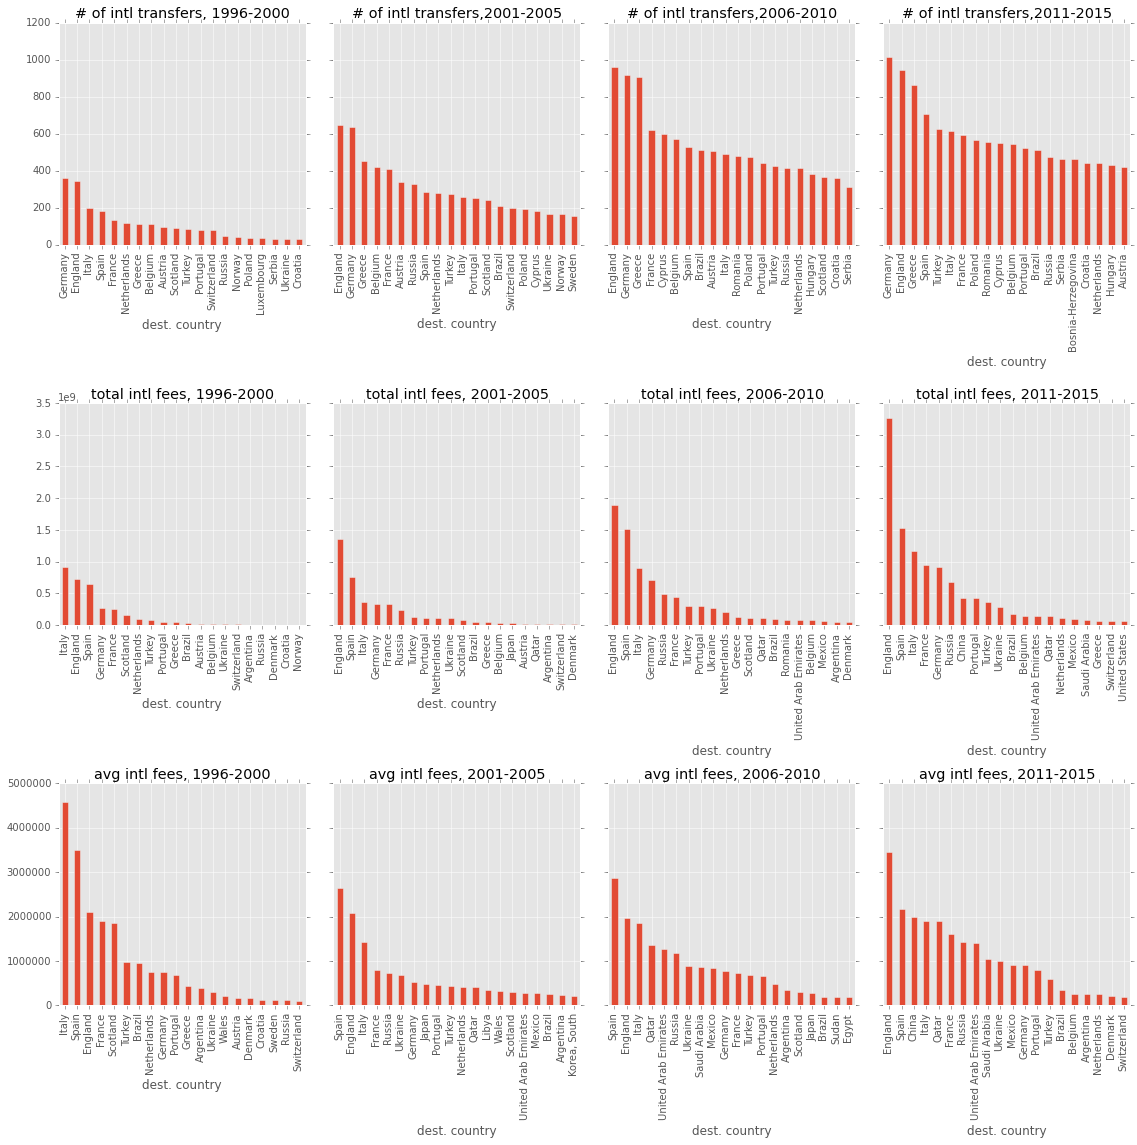

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16),sharex=False,sharey='row')

t=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'dest. country'}).groupby(['period','dest. country'])['feeValue'].count()
t['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,0],title='# of intl transfers, 1996-2000')
t['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,1],title='# of intl transfers,2001-2005')
t['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,2],title='# of intl transfers,2006-2010') 
t['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,3],title='# of intl transfers,2011-2015') 

s=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'dest. country'}).groupby(['period','dest. country'])['feeValue'].sum()
s['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,0],title='total intl fees, 1996-2000')
s['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,1],title='total intl fees, 2001-2005')
s['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,2],title='total intl fees, 2006-2010') 
s['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,3],title='total intl fees, 2011-2015') 

r=nonloans[(nonloans.fromCountry!=nonloans.toCountry)].rename(columns={'toCountry':'dest. country'}).groupby(['period','dest. country'])['feeValue'].mean()
r['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,0],title='avg intl fees, 1996-2000')
r['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,1],title='avg intl fees, 2001-2005')
r['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,2],title='avg intl fees, 2006-2010') 
r['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,3],title='avg intl fees, 2011-2015') 

plt.tight_layout()


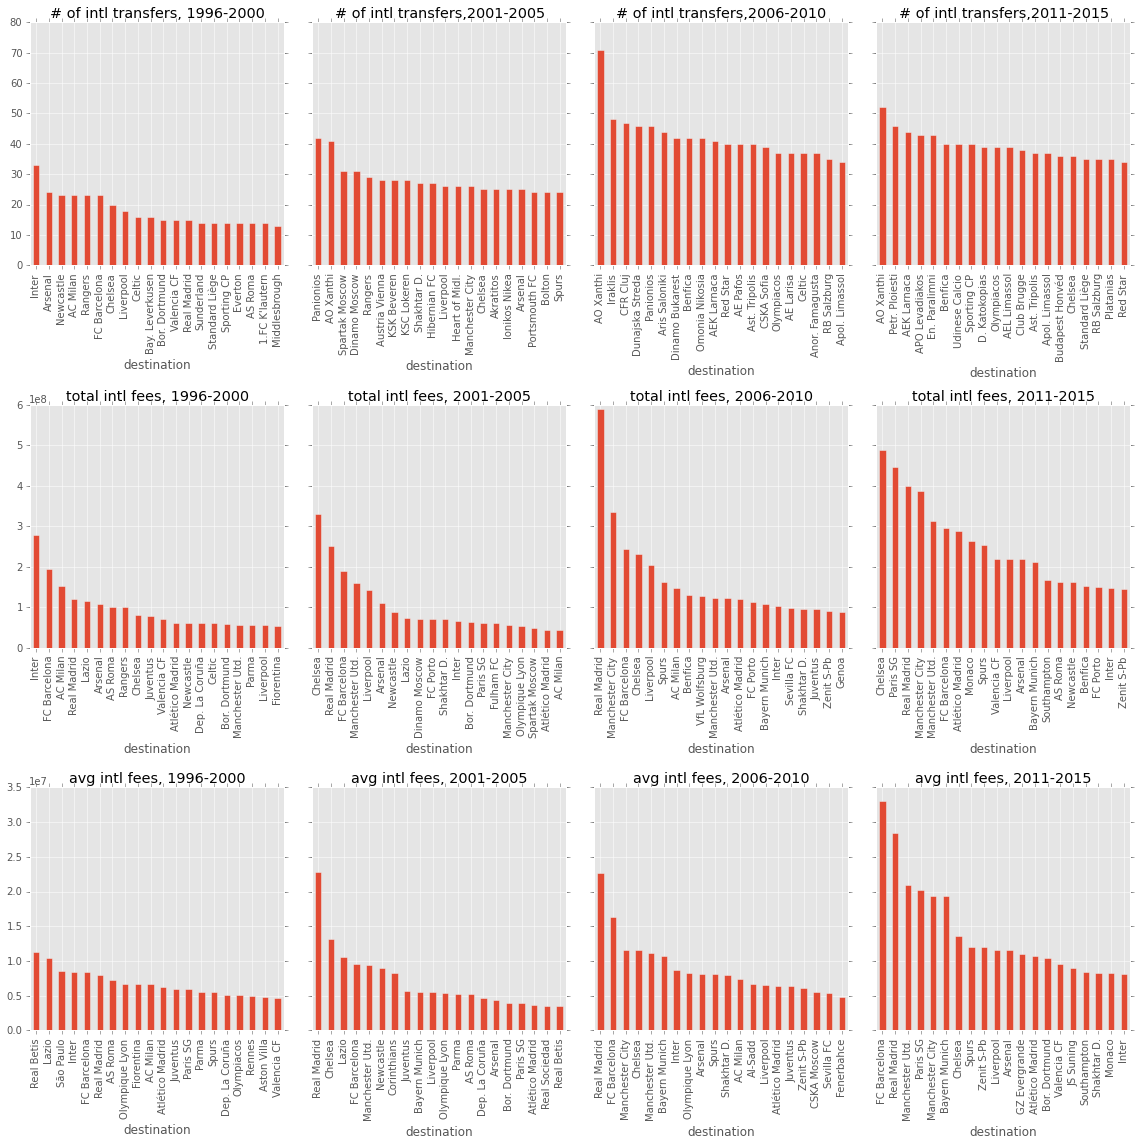

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16),sharex=False,sharey='row')

t=nonloans[(nonloans.fromCountry!=nonloans.toCountry)&(nonloans.toCountry.notnull())].rename(columns={'toTeamId':'dest. club'}).groupby(['period','dest. club'])['feeValue'].count().rename(index=teamIdMap)
t['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,0],title='# of intl transfers, 1996-2000')
t['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,1],title='# of intl transfers,2001-2005')
t['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,2],title='# of intl transfers,2006-2010') 
t['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[0,3],title='# of intl transfers,2011-2015') 

s=nonloans[(nonloans.fromCountry!=nonloans.toCountry)&(nonloans.toCountry.notnull())].rename(columns={'toTeamId':'dest. club'}).groupby(['period','dest. club'])['feeValue'].sum().rename(index=teamIdMap)
s['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,0],title='total intl fees, 1996-2000')
s['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,1],title='total intl fees, 2001-2005')
s['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,2],title='total intl fees, 2006-2010') 
s['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[1,3],title='total intl fees, 2011-2015') 

r=nonloans[(nonloans.fromCountry!=nonloans.toCountry)&(nonloans.toCountry.notnull())].rename(columns={'toTeamId':'dest. club'}).groupby(['period','dest. club'])['feeValue'].mean().rename(index=teamIdMap)
r['(1995, 2000]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,0],title='avg intl fees, 1996-2000')
r['(2000, 2005]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,1],title='avg intl fees, 2001-2005')
r['(2005, 2010]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,2],title='avg intl fees, 2006-2010') 
r['(2010, 2015]'].sort_values(ascending=False)[:20].plot.bar(ax=axes[2,3],title='avg intl fees, 2011-2015') 

plt.tight_layout()


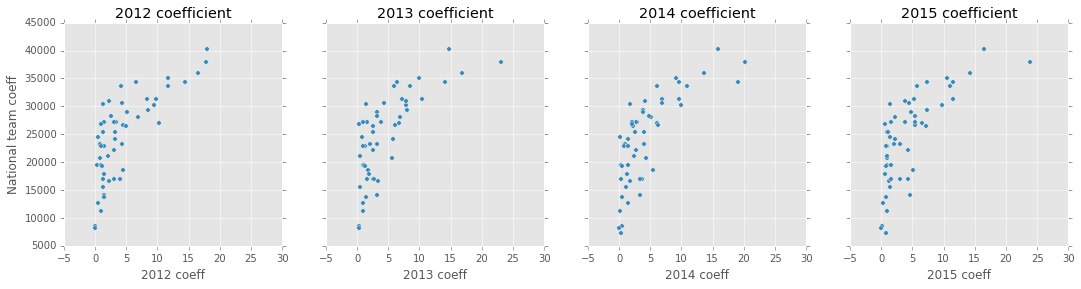

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4),sharex=True,sharey='row')

country_coeff.join(natteam_coeff).plot.scatter('2012 coeff','National team coeff',ax=axes[0],title='2012 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2013 coeff','National team coeff',ax=axes[1],title='2013 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2014 coeff','National team coeff',ax=axes[2],title='2014 coefficient')
country_coeff.join(natteam_coeff).plot.scatter('2015 coeff','National team coeff',ax=axes[3],title='2015 coefficient')

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')
countryInfo.marketTier=np.where(countryInfo.marketTier==4,3,countryInfo.marketTier)

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

country_coeff=pd.read_table('../data/reference/country_coefficient.csv').reset_index(drop=True)
country_coeff.columns=['Movement','Country','2012 coeff','2013 coeff','2014 coeff','2015 coeff','2016 coeff','Total coeff','Teams Total','CL','EL','Total']
country_coeff=country_coeff.drop(['Movement','2016 coeff','CL','EL','Total','Teams Total','Total coeff'],axis=1)
country_coeff['Country']=country_coeff['Country'].str.split('\(L',expand=True)[0].str.strip()
country_coeff=country_coeff.set_index('Country')
country_coeff = country_coeff.join(DataFrame({'total coeff':country_coeff.sum(axis=1)}))

natteam_coeff=pd.read_table('../data/reference/national_team_coefficient.csv').reset_index(drop=True).drop('Rank',axis=1)
natteam_coeff['Country']=natteam_coeff['Country'].str.strip()
natteam_coeff.Coefficient=natteam_coeff.Coefficient.apply(lambda s: int(s.replace(',','')))
natteam_coeff=natteam_coeff.rename(columns={'Coefficient':'National team coeff'}).set_index('Country')

club_coeff=pd.read_table('../data/reference/club_coefficient.csv').reset_index(drop=True).set_index('Club')
club_coeff=club_coeff.drop(['2017','2016','Mvmt','Total'],axis=1)
club_coeff.Association = club_coeff.Association.str.split(expand=True)[0]
# sanity check: club_coeff.merge(DataFrame({'Team Name':teamIdMap}),how='left',left_on='Team Id',right_index=True)
club_coeff=club_coeff.reset_index().set_index('Team Id').rename(columns=lambda c: 'Club coeff ' + c.split('–')[0] if '–' in c else c)

gdp=pd.read_table('../data/reference/country_gdp.csv').reset_index(drop=True).drop('2014 Rank',axis=1).rename(columns={'Country ':'Country'})
gdp.Country=gdp.Country.str.strip()
gdp=gdp.set_index('Country')
gdp.columns=['GDP '+c for c in gdp.columns.str.strip()]
for column in gdp.columns:
    gdp[column]=gdp[column].apply(lambda s: float(str(s).replace(',','')))
    
unemployed=pd.read_table('../data/reference/country_unemployment.csv').drop(['Date','Employment rate'],axis=1)
unemployed.columns=['Country','Unemployment']
unemployed['Country']=unemployed['Country'].str.split(' ').apply(lambda arr: ' '.join(arr[:len(arr)/2]))
unemployed=unemployed.set_index('Country').rename(index={'United Kingdom':'England'})

corruption=pd.read_table('../data/reference/country_corruption.csv').drop(['Rank'],axis=1)
corruption.Country=corruption.Country.str.strip()
corruption=corruption.set_index('Country')
corruption=corruption[corruption.columns[:1]].rename(columns={'2015 score':'Corruption'}).rename(index={'United Kingdom':'England'})

population=pd.read_table('../data/reference/country_population.csv').drop(['Rank'],axis=1)
population.columns=population.columns.str.strip()
population.Country=population.Country.str.split('[',expand=True)[0].str.strip()
population['Population']=population['Population'].apply(lambda s: float(str(s).replace(',','')))
population=population[['Country','Population','Growth %']].set_index('Country').rename(index={'United Kingdom':'England'})

barometer=pd.read_table('../data/reference/country_corruption_barometer.csv').reset_index(drop=True)
barometer.columns=['Corruption Rank','Country','Bribe %']
barometer.Country=barometer.Country.str.strip()
barometer=barometer.set_index('Country').rename(index={'United Kingdom':'England'})

countryInfo=natteam_coeff.join(country_coeff).join(gdp).join(unemployed).join(corruption).join(population).join(countryInfo).join(barometer)

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (0,38,40,41,45,47,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (40,45,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False

In [111]:
t=nonloans[(nonloans.season>2000)&(nonloans.fromCountry!=nonloans.toCountry)]
s=nonloans[(nonloans.season>2000)&(nonloans.age>21)]

meanFeeImportPeriod = t.groupby(['toCountry','period']).feeValue.mean().unstack().rename(columns=lambda col:'avg import fee '+col)
totalFeeImportPeriod = t.groupby(['toCountry','period']).feeValue.sum().unstack().rename(columns=lambda col:'total import fees '+col)
meanAgeImportPeriod = t.groupby(['toCountry','period']).age.mean().unstack().rename(columns=lambda col:'avg import age '+col)
paidImportPeriod = t[t.feeValue>0].groupby(['toCountry','period']).id.count().unstack().rename(columns=lambda col:'# of paid imports '+col)
freeImportPeriod = t[t.feeValue==0].groupby(['toCountry','period']).id.count().unstack().rename(columns=lambda col:'# of free imports '+col)
totalImportPeriod = t.groupby(['toCountry','period']).id.count().unstack().rename(columns=lambda col:'# of imports '+col)

meanFeeIExportPeriod = t.groupby(['fromCountry','period']).feeValue.mean().unstack().rename(columns=lambda col:'avg export fee '+col)
totalFeeExportPeriod = t.groupby(['fromCountry','period']).feeValue.sum().unstack().rename(columns=lambda col:'total export fees '+col)
meanAgeExportPeriod = t.groupby(['fromCountry','period']).age.mean().unstack().rename(columns=lambda col:'avg export age '+col)
paidExportPeriod = t[t.feeValue>0].groupby(['fromCountry','period']).id.count().unstack().rename(columns=lambda col:'# of paid exports '+col)
freeExportPeriod = t[t.feeValue==0].groupby(['fromCountry','period']).id.count().unstack().rename(columns=lambda col:'# of free exports '+col)
totalExportPeriod = t.groupby(['fromCountry','period']).id.count().unstack().rename(columns=lambda col:'# of exports '+col)

meanDurationPeriod = s.groupby(['fromCountry','period']).duration.mean().unstack().rename(columns=lambda col:'avg duration '+col)
volumePeriod = s.groupby(['fromCountry','period']).id.count().unstack().rename(columns=lambda col:'21-plus transfer volume '+col)

meanFeeImportAll = t.groupby(['toCountry'])[['feeValue']].mean().rename(columns=lambda col:'avg import fee overall')
totalFeeImportAll = t.groupby(['toCountry'])[['feeValue']].sum().rename(columns=lambda col:'total import fees overall')
meanAgeImportAll = t.groupby(['toCountry'])[['age']].mean().rename(columns=lambda col:'avg import age overall')
paidImportAll = t[t.feeValue>0].groupby(['toCountry'])[['id']].count().rename(columns=lambda col:'# of paid imports overall')
freeImportAll = t[t.feeValue==0].groupby(['toCountry'])[['id']].count().rename(columns=lambda col:'# of free imports overall')
totalImportAll = t.groupby(['toCountry'])[['id']].count().rename(columns=lambda col:'# of imports overall')

meanFeeExportAll = t.groupby(['fromCountry'])[['feeValue']].mean().rename(columns=lambda col:'avg export fee overall')
totalFeeExportAll = t.groupby(['fromCountry'])[['feeValue']].sum().rename(columns=lambda col:'total export fees overall')
meanAgeExportAll = t.groupby(['fromCountry'])[['age']].mean().rename(columns=lambda col:'avg export age overall')
paidExportAll = t[t.feeValue>0].groupby(['fromCountry'])[['id']].count().rename(columns=lambda col:'# of paid exports overall')
freeExportAll= t[t.feeValue==0].groupby(['fromCountry'])[['id']].count().rename(columns=lambda col:'# of free exports overall')
totalExportAll = t.groupby(['fromCountry'])[['id']].count().rename(columns=lambda col:'# of exports overall')

meanDurationAll = s.groupby(['fromCountry'])[['duration']].mean().rename(columns=lambda col:'avg duration overall')
volumeAll = s.groupby(['fromCountry'])[['id']].count().rename(columns=lambda col:'21-plus transfer volume overall')

fulljoin=countryInfo.join(meanFeeImportPeriod).join(totalFeeImportPeriod).join(meanAgeImportPeriod).join(paidImportPeriod).join(freeImportPeriod)\
    .join(totalImportPeriod).join(meanFeeIExportPeriod).join(totalFeeExportPeriod).join(meanAgeExportPeriod).join(paidExportPeriod)\
    .join(freeExportPeriod).join(totalExportPeriod).join(meanDurationPeriod).join(volumePeriod)\
    .join(meanFeeImportAll).join(totalFeeImportAll).join(meanAgeImportAll).join(paidImportAll).join(freeImportAll)\
    .join(totalImportAll).join(meanFeeExportAll).join(totalFeeExportAll).join(meanAgeExportAll).join(paidExportAll)\
    .join(freeExportAll).join(totalExportAll).join(meanDurationAll).join(volumeAll)
    
fulljoin.to_excel('../data/output/country_summary.xlsx')
fulljoin

,National team coeff,2012 coeff,2013 coeff,2014 coeff,2015 coeff,total coeff,GDP 2010,GDP 2011,GDP 2012,GDP 2013,...,# of free imports overall,# of imports overall,avg export fee overall,total export fees overall,avg export age overall,# of paid exports overall,# of free exports overall,# of exports overall,avg duration overall,21-plus transfer volume overall
Country,,,,,,,,,,,,,,,,,,,,,
Germany,40236,17.928,14.714,15.857,16.428,64.927,3418.371,3755.549,3535.199,3831.427,...,1729.0,3507.0,4.966945e+05,1.280975e+09,27.401203,439.0,2140.0,4156.0,785.471215,7962.0
Spain,37962,17.714,23.000,20.214,23.928,84.856,1434.257,1495.968,1356.483,1393.476,...,972.0,2155.0,1.652338e+06,2.932900e+09,28.050064,459.0,1316.0,3136.0,791.597415,7640.0
England,35963,16.428,16.785,13.571,14.250,61.034,2409.409,2594.114,2624.291,2680.123,...,1345.0,3617.0,8.657902e+05,2.113394e+09,27.175012,419.0,2022.0,4276.0,876.007576,7969.0
Portugal,35138,11.750,9.916,9.083,10.500,41.249,238.748,245.120,216.488,224.983,...,915.0,2168.0,1.226864e+06,1.828028e+09,26.929966,414.0,1076.0,2613.0,705.026633,5375.0
Belgium,34442,6.500,6.400,9.600,7.400,29.900,485.307,528.721,499.129,524.970,...,1260.0,2512.0,3.758827e+05,5.863770e+08,26.734412,262.0,1298.0,2967.0,764.369454,5416.0
Italy,34345,14.416,14.166,19.000,11.500,59.082,2130.586,2280.315,2076.370,2137.615,...,661.0,2594.0,2.090930e+06,2.553026e+09,27.883022,365.0,856.0,3163.0,746.764949,8595.0
Netherlands,33679,4.214,5.916,6.083,5.750,21.963,837.949,894.576,823.595,853.806,...,852.0,1735.0,8.212738e+05,1.205630e+09,26.779124,363.0,1105.0,2558.0,903.022510,4789.0
France,33599,11.750,8.500,10.916,11.083,42.249,2651.772,2865.304,2688.210,2807.306,...,1129.0,2511.0,9.595873e+05,2.285737e+09,26.222384,547.0,1835.0,4121.0,892.793771,6643.0
Russia,31345,9.750,10.416,9.666,11.500,41.332,1524.915,1904.790,2015.154,2079.134,...,640.0,2091.0,5.642458e+05,5.693240e+08,26.746038,176.0,833.0,2398.0,687.315219,5231.0


In [62]:
t=nonloans[(nonloans.season>2000)&(nonloans.fromCountry!=nonloans.toCountry)]
s=nonloans[(nonloans.season>2000)&(nonloans.age>21)]

meanFeeImportPeriod = t.groupby(['toTeamId','period']).feeValue.mean().unstack().rename(columns=lambda col:'avg import fee '+col)
totalFeeImportPeriod = t.groupby(['toTeamId','period']).feeValue.sum().unstack().rename(columns=lambda col:'total import fees '+col)
meanAgeImportPeriod = t.groupby(['toTeamId','period']).age.mean().unstack().rename(columns=lambda col:'avg import age '+col)
paidImportPeriod = t[t.feeValue>0].groupby(['toTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of paid imports '+col)
freeImportPeriod = t[t.feeValue==0].groupby(['toTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of free imports '+col)
totalImportPeriod = t.groupby(['toTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of imports '+col)

meanFeeIExportPeriod = t.groupby(['fromTeamId','period']).feeValue.mean().unstack().rename(columns=lambda col:'avg export fee '+col)
totalFeeExportPeriod = t.groupby(['fromTeamId','period']).feeValue.sum().unstack().rename(columns=lambda col:'total export fees '+col)
meanAgeExportPeriod = t.groupby(['fromTeamId','period']).age.mean().unstack().rename(columns=lambda col:'avg export age '+col)
paidExportPeriod = t[t.feeValue>0].groupby(['fromTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of paid exports '+col)
freeExportPeriod = t[t.feeValue==0].groupby(['fromTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of free exports '+col)
totalExportPeriod = t.groupby(['fromTeamId','period']).id.count().unstack().rename(columns=lambda col:'# of exports '+col)

meanDurationPeriod = s.groupby(['fromTeamId','period']).duration.mean().unstack().rename(columns=lambda col:'avg duration '+col)

meanFeeImportAll = t.groupby(['toTeamId'])[['feeValue']].mean().rename(columns=lambda col:'avg import fee overall')
totalFeeImportAll = t.groupby(['toTeamId'])[['feeValue']].sum().rename(columns=lambda col:'total import fees overall')
meanAgeImportAll = t.groupby(['toTeamId'])[['age']].mean().rename(columns=lambda col:'avg import age overall')
paidImportAll = t[t.feeValue>0].groupby(['toTeamId'])[['id']].count().rename(columns=lambda col:'# of paid imports overall')
freeImportAll = t[t.feeValue==0].groupby(['toTeamId'])[['id']].count().rename(columns=lambda col:'# of free imports overall')
totalImportAll = t.groupby(['toTeamId'])[['id']].count().rename(columns=lambda col:'# of imports overall')

meanFeeExportAll = t.groupby(['fromTeamId'])[['feeValue']].mean().rename(columns=lambda col:'avg export fee overall')
totalFeeExportAll = t.groupby(['fromTeamId'])[['feeValue']].sum().rename(columns=lambda col:'total export fees overall')
meanAgeExportAll = t.groupby(['fromTeamId'])[['age']].mean().rename(columns=lambda col:'avg export age overall')
paidExportAll = t[t.feeValue>0].groupby(['fromTeamId'])[['id']].count().rename(columns=lambda col:'# of paid exports overall')
freeExportAll= t[t.feeValue==0].groupby(['fromTeamId'])[['id']].count().rename(columns=lambda col:'# of free exports overall')
totalExportAll = t.groupby(['fromTeamId'])[['id']].count().rename(columns=lambda col:'# of exports overall')

meanDurationAll = s.groupby(['fromTeamId'])[['duration']].mean().rename(columns=lambda col:'avg duration overall')

clubjoin=club_coeff.join(meanFeeImportPeriod).join(totalFeeImportPeriod).join(meanAgeImportPeriod).join(paidImportPeriod).join(freeImportPeriod)\
    .join(totalImportPeriod).join(meanFeeIExportPeriod).join(totalFeeExportPeriod).join(meanAgeExportPeriod).join(paidExportPeriod)\
    .join(freeExportPeriod).join(totalExportPeriod).join(meanDurationPeriod)\
    .join(meanFeeImportAll).join(totalFeeImportAll).join(meanAgeImportAll).join(paidImportAll).join(freeImportAll)\
    .join(totalImportAll).join(meanFeeIExportAll).join(totalFeeExportAll).join(meanAgeExportAll).join(paidExportAll)\
    .join(freeExportAll).join(totalExportAll).join(meanDurationAll)

ew = pd.ExcelWriter('../data/output/top_club_summary.xls', encoding='utf-8')
j=clubjoin.merge(fulljoin,how='left',left_on='Association',right_index=True,suffixes=('',', country'))
j.to_excel(ew)
ew.save()


In [2]:
%ls ../data/reference/GCB2013_DataPack 

GCB2013_Data.xls*                   GCB_CountryCoverage_2003to2013.xls*
GCB2013_Methodology_EN.pdf          GCB_Questions_2003to2013.xls*


In [18]:
bribes=pd.read_excel('../data/reference/GCB2013_DataPack/GCB2013_Data.xls',sheetname=7,skiprows=3)

bribes=bribes[['Country']+[bribes.columns[-1]]][1:].set_index('Country')

bribes.ix['Germany']

,Have you paid a bribe to any of the 8 services listed?
Country,
Germany,NaN
Germany,NaN


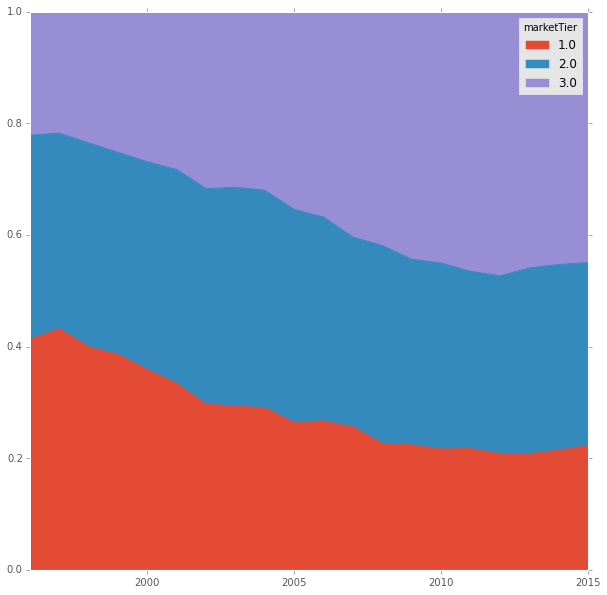

In [134]:
t=countryInfo.join(nonloans[(nonloans.toCountry!=nonloans.fromCountry)|(nonloans.age>21)].groupby(['toCountry','season'])['id'].count().unstack()).groupby('marketTier').sum().T[-20:] #.plot.line()
t[3]=t[3]+t[4]
t=t.drop(4,axis=1)
s=t.sum(axis=1)
t[1]=t[1]/s
t[2]=t[2]/s
t[3]=t[3]/s
t.plot.area(stacked=True,figsize=(10,10))

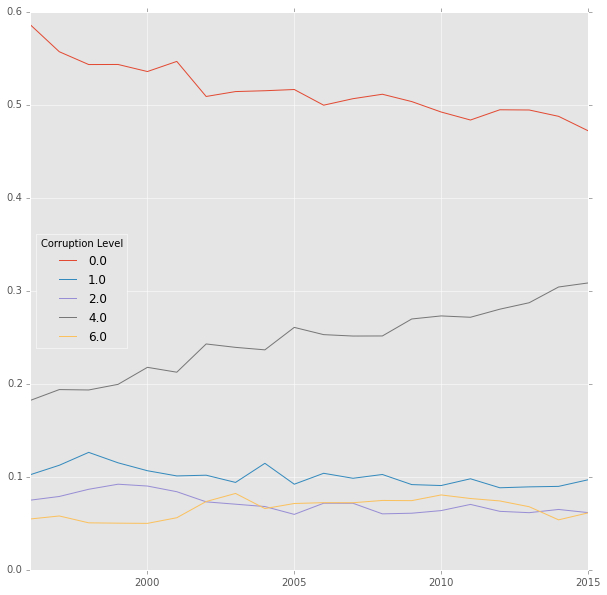

In [109]:
countryInfo['Corruption Level']=countryInfo['Corruption'].apply(lambda x: math.floor(x/20))
countryInfo['Corruption Level']=countryInfo['Corruption Rank'].fillna(1).apply(lambda x: math.floor(x/10))
t=countryInfo.join(nonloans.groupby(['toCountry','season'])['id'].count().unstack())
t=t[t['marketTier']==2].groupby('Corruption Level').sum().T[-20:] #.plot.line()
s=t.sum(axis=1)
for c in t.columns:
    t[c]=t[c]/s
t.plot.line(stacked=False,figsize=(10,10))

In [121]:
countryInfo[countryInfo.marketTier>=3].count()

National team coeff    37
2012 coeff             35
2013 coeff             35
2014 coeff             36
2015 coeff             36
total coeff            36
GDP 2010               27
GDP 2011               27
GDP 2012               26
GDP 2013               27
GDP 2014               27
Unemployment           33
Corruption             31
Population             33
Growth %               33
federation             37
marketTier             37
Corruption Rank        21
Bribe %                21
Corruption Level       37
dtype: int64

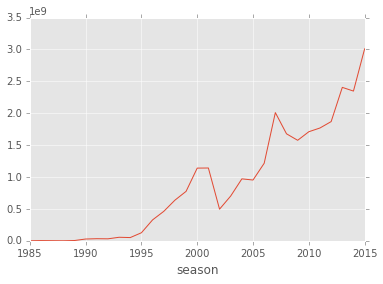

In [132]:
nonloans[(nonloans.feeValue>0)&(nonloans.fromCountry!=nonloans.toCountry)].groupby('season').feeValue.sum().plot.line()
#nonloans[nonloans.fromCountry!=nonloans.toCountry].groupby('season').feeValue.mean().plot.line()

In [135]:
countryInfo['marketTier'].sort_values()

Country
Germany               1.0
Spain                 1.0
England               1.0
Italy                 1.0
France                1.0
Scotland              2.0
Greece                2.0
Denmark               2.0
Ukraine               2.0
Austria               2.0
Turkey                2.0
Russia                2.0
Netherlands           2.0
Belgium               2.0
Portugal              2.0
Switzerland           2.0
Croatia               3.0
Cyprus                3.0
Belarus               3.0
Lithuania             3.0
Estonia               3.0
Bulgaria              3.0
Finland               3.0
Serbia                3.0
Kazakhstan            3.0
Luxembourg            3.0
Israel                3.0
Malta                 3.0
Slovenia              3.0
Ireland               3.0
Azerbaijan            3.0
Hungary               3.0
Slovakia              3.0
Romania               3.0
Poland                3.0
Sweden                3.0
Czech Republic        3.0
Bosnia-Herzegovina    3.0
Latv